In [5]:
import pandas as pd
import numpy as np

# Load data (use your exact path)
df = pd.read_csv(r"C:\Users\melod\Downloads\MUP_OUT_RY25_P04_V10_DY23_Geo.csv")

# Clean up column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Convert numeric columns (update if needed)
num_cols = [
    'bene_cnt', 'capc_srvcs', 'avg_tot_sbmtd_chrgs',
    'avg_mdcr_alowd_amt', 'avg_mdcr_pymt_amt',
    'outlier_srvcs', 'avg_mdcr_outlier_amt'
]
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Handle missing values by filling with 0
df[num_cols] = df[num_cols].fillna(0)

# Drop any duplicates
df = df.drop_duplicates()

# Quick summary to inspect data quality
print(df.describe())

# Save cleaned data to CSV in same Downloads folder
df.to_csv(r"C:\Users\melod\Downloads\cleaned_medicare_outpatient.csv", index=False)
print("Cleaned data saved to Downloads folder.")


       rndrng_prvdr_geo_cd        apc_cd       bene_cnt     capc_srvcs  \
count         86723.000000  90034.000000   90034.000000   90034.000000   
mean             28.975278   5244.592121     223.937324     245.037397   
std              15.589552    246.107341    4754.255039    5225.889621   
min               1.000000   5072.000000       0.000000       0.000000   
25%              17.000000   5113.000000       0.000000       0.000000   
50%              29.000000   5166.000000       0.000000       0.000000   
75%              42.000000   5362.000000      27.000000      28.000000   
max              56.000000   8011.000000  795392.000000  864077.000000   

       avg_tot_sbmtd_chrgs  avg_mdcr_alowd_amt  avg_mdcr_pymt_amt  \
count         90034.000000        90034.000000       90034.000000   
mean          13206.685913         2113.740955        1778.604412   
std           25114.813898         4320.988944        3887.801829   
min               0.000000            0.000000           

In [9]:
# Create summary statistics DataFrame
summary = df.describe().T[['mean', 'std', 'min', 'max']].round(2)

# Print nicely
print("Summary statistics (cleaned data):\n")
print(summary.to_string())


Summary statistics (cleaned data):

                          mean       std     min        max
rndrng_prvdr_geo_cd      28.98     15.59     1.0      56.00
apc_cd                 5244.59    246.11  5072.0    8011.00
bene_cnt                223.94   4754.26     0.0  795392.00
capc_srvcs              245.04   5225.89     0.0  864077.00
avg_tot_sbmtd_chrgs   13206.69  25114.81     0.0  322876.48
avg_mdcr_alowd_amt     2113.74   4320.99     0.0   48806.14
avg_mdcr_pymt_amt      1778.60   3887.80     0.0   47206.14
outlier_srvcs             3.96     94.55     0.0   13516.00
avg_mdcr_outlier_amt    162.66    889.48     0.0   25616.95


In [15]:
import pandas as pd
df = pd.read_csv("C:/Users/melod/Downloads/cleaned_medicare_outpatient.csv")


In [19]:
print(df.columns.tolist())


['rndrng_prvdr_geo_lvl', 'rndrng_prvdr_geo_cd', 'rndrng_prvdr_geo_desc', 'srvc_lvl', 'apc_cd', 'apc_desc', 'hcpcs_cd', 'hcpcs_desc', 'bene_cnt', 'capc_srvcs', 'avg_tot_sbmtd_chrgs', 'avg_mdcr_alowd_amt', 'avg_mdcr_pymt_amt', 'outlier_srvcs', 'avg_mdcr_outlier_amt']


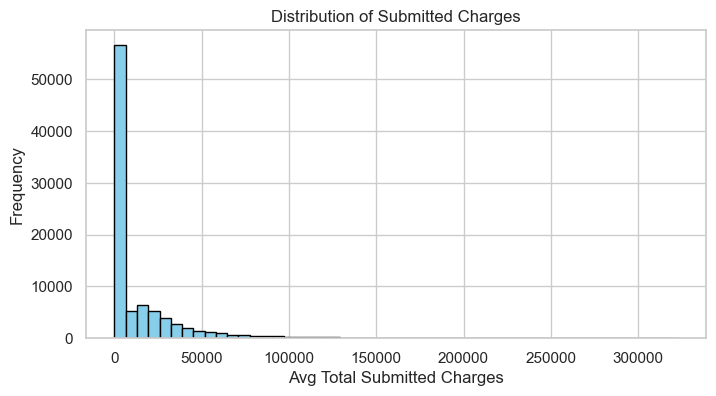

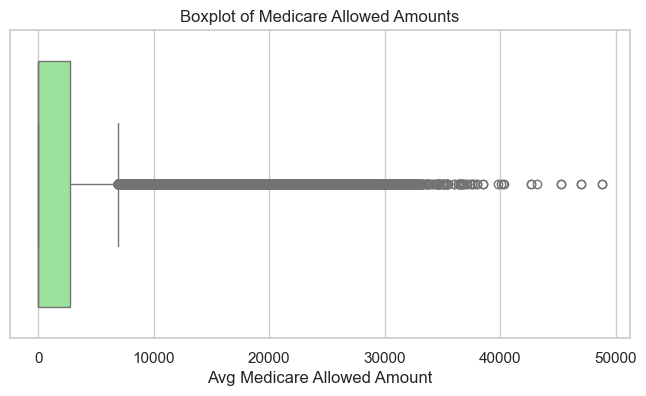

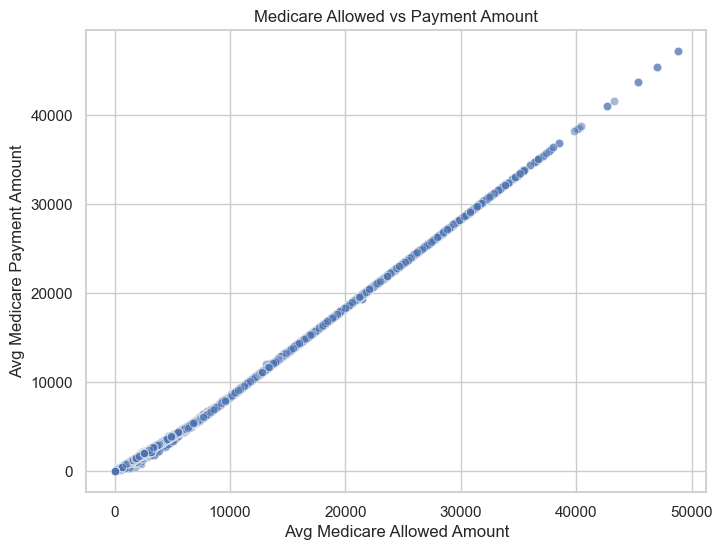

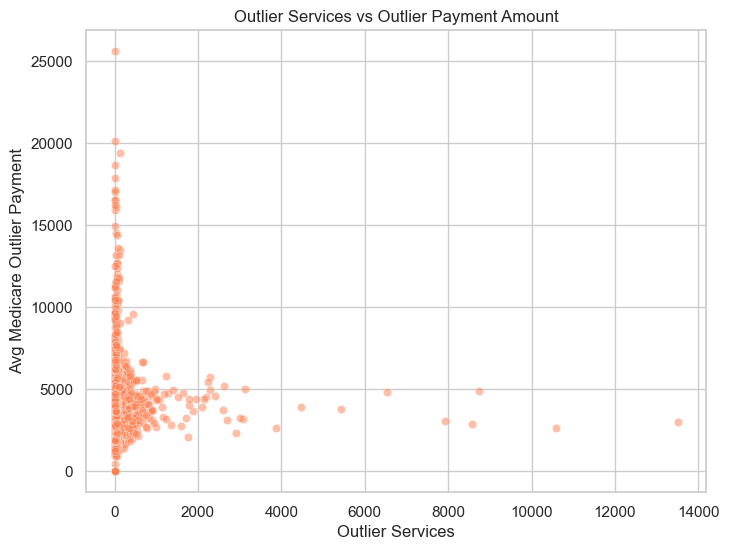

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# 1. Histogram of submitted charges
plt.figure(figsize=(8,4))
plt.hist(df['avg_tot_sbmtd_chrgs'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Submitted Charges')
plt.xlabel('Avg Total Submitted Charges')
plt.ylabel('Frequency')
plt.show()

# 2. Boxplot of Medicare allowed amounts
plt.figure(figsize=(8,4))
sns.boxplot(x=df['avg_mdcr_alowd_amt'], color='lightgreen')
plt.title('Boxplot of Medicare Allowed Amounts')
plt.xlabel('Avg Medicare Allowed Amount')
plt.show()

# 3. Scatter plot: allowed vs payment amount
plt.figure(figsize=(8,6))
sns.scatterplot(x='avg_mdcr_alowd_amt', y='avg_mdcr_pymt_amt', data=df, alpha=0.5)
plt.title('Medicare Allowed vs Payment Amount')
plt.xlabel('Avg Medicare Allowed Amount')
plt.ylabel('Avg Medicare Payment Amount')
plt.show()

# 4. Outlier services vs outlier payment amount
plt.figure(figsize=(8,6))
sns.scatterplot(x='outlier_srvcs', y='avg_mdcr_outlier_amt', data=df, alpha=0.5, color='coral')
plt.title('Outlier Services vs Outlier Payment Amount')
plt.xlabel('Outlier Services')
plt.ylabel('Avg Medicare Outlier Payment')
plt.show()


In [1]:
import pandas as pd
import sqlite3

# Load your cleaned CSV file (with correct column names)
df = pd.read_csv(r"C:\Users\melod\Downloads\cleaned_medicare_outpatient.csv")

# Connect to a new SQLite database file
conn = sqlite3.connect(r"C:\Users\melod\Downloads\medicare_outpatient.db")

# Write the DataFrame to the database as a table named 'medicare_outpatient'
df.to_sql("medicare_outpatient", conn, if_exists='replace', index=False)

# Close connection
conn.close()

print("✅ Database created with table 'medicare_outpatient' and proper columns.")


DatabaseError: Execution failed on sql '
        SELECT
            name
        FROM
            sqlite_master
        WHERE
            type IN ('table', 'view')
            AND name=?;
        ': database is locked